<a href="https://colab.research.google.com/github/f247805/DeepLearning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# You may need to adjust the file path based on the actual location of your CSV file
df = pd.read_csv('/content/content/data_date.csv')



In [55]:
# Extract relevant columns
data = df[['Date', 'Country', 'AQI Value']]

# Convert 'DateTime' to a datetime object
new_dates = pd.to_datetime(data['Date']).copy()

# Create a new DataFrame with the modified 'Date' column
new_data = data.copy()
new_data['Date'] = new_dates

# Set the 'Date' column as the index
new_data.set_index('Date', inplace=True)

In [56]:
# Normalize data
# Drop non-numeric columns before normalization
numeric_data = data.drop(['Date', 'Country'], axis=1)
scaler = MinMaxScaler()
# Drop non-numeric columns before normalization
numeric_data = data.drop(['Date', 'Country'], axis=1)

Epoch 1/50
2/2 [==============================] - 2s 286ms/step - loss: 0.0644 - mae: 0.1717 - val_loss: 0.0110 - val_mae: 0.0994
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 0.0587 - mae: 0.1575 - val_loss: 0.0085 - val_mae: 0.0876
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0542 - mae: 0.1457 - val_loss: 0.0063 - val_mae: 0.0758
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0503 - mae: 0.1341 - val_loss: 0.0047 - val_mae: 0.0642
Epoch 5/50
2/2 [==============================] - 0s 54ms/step - loss: 0.0464 - mae: 0.1230 - val_loss: 0.0034 - val_mae: 0.0536
Epoch 6/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0428 - mae: 0.1116 - val_loss: 0.0025 - val_mae: 0.0435
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0400 - mae: 0.0985 - val_loss: 0.0021 - val_mae: 0.0324
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0368 - mae: 0.0858 - va

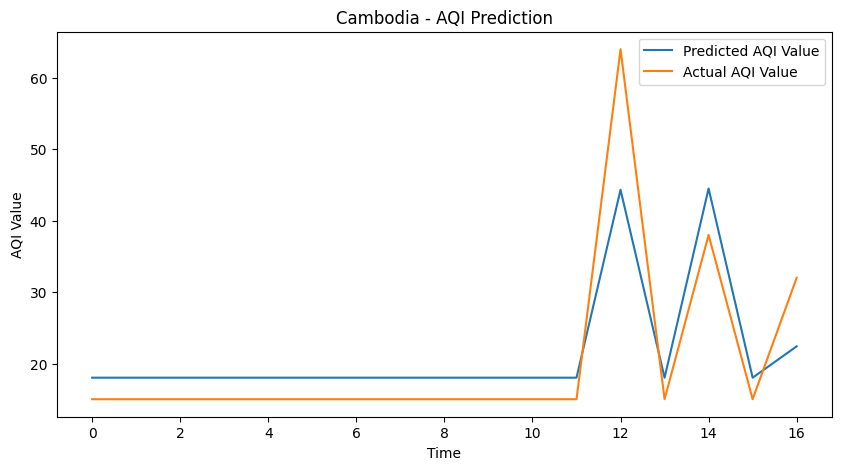

Epoch 1/50
2/2 [==============================] - 2s 284ms/step - loss: 0.2688 - mae: 0.4312 - val_loss: 0.1694 - val_mae: 0.3636
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2533 - mae: 0.4163 - val_loss: 0.1582 - val_mae: 0.3510
Epoch 3/50
2/2 [==============================] - 0s 55ms/step - loss: 0.2388 - mae: 0.4015 - val_loss: 0.1472 - val_mae: 0.3382
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2236 - mae: 0.3877 - val_loss: 0.1365 - val_mae: 0.3250
Epoch 5/50
2/2 [==============================] - 0s 52ms/step - loss: 0.2096 - mae: 0.3746 - val_loss: 0.1258 - val_mae: 0.3113
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1951 - mae: 0.3591 - val_loss: 0.1154 - val_mae: 0.2971
Epoch 7/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1811 - mae: 0.3451 - val_loss: 0.1050 - val_mae: 0.2835
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1665 - mae: 0.3306 - va

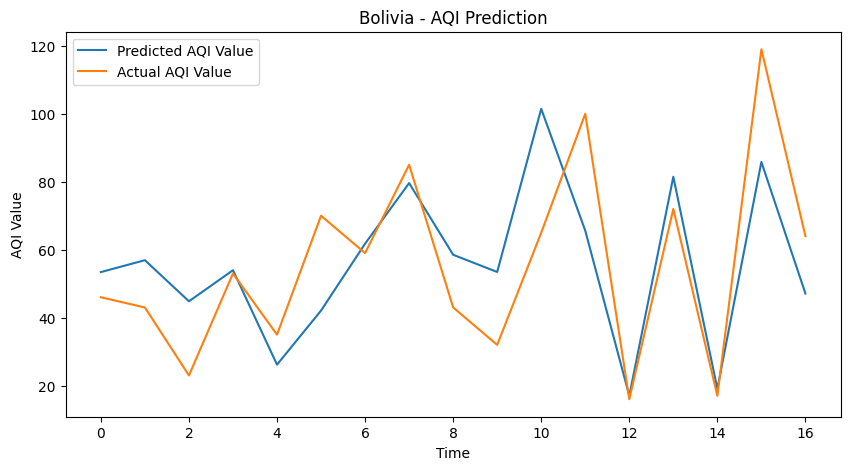

In [59]:
for country in ['Cambodia', 'Bolivia']:
    country_data = data[data['Country'] == country]

    # Preprocessing
    # You may need to further preprocess the data based on your specific requirements

    # Example: Normalize 'AQI Value'
    scaler = MinMaxScaler()
    country_data['AQI Value'] = scaler.fit_transform(country_data[['AQI Value']])

    # Example: Create sequences for time series prediction
    look_back = 10
    X, y = [], []
    for i in range(len(country_data) - look_back):
        X.append(country_data['AQI Value'].values[i:(i + look_back)])
        y.append(country_data['AQI Value'].values[i + look_back])

    X, y = np.array(X), np.array(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(look_back, 1)),
        tf.keras.layers.Dense(units=1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)

    # Make predictions
    predictions = model.predict(X_test)

    # Inverse transform the predictions and actual values to the original scale
    predictions_inv = scaler.inverse_transform(predictions)
    # Reshape y_test to a 2D array before inverse transform
    y_test = y_test.reshape(-1, 1)
    y_test_inv = scaler.inverse_transform(y_test)

    # Visualize predictions for each country
    plt.figure(figsize=(10, 5))
    plt.plot(predictions_inv, label='Predicted AQI Value')
    plt.plot(y_test_inv, label='Actual AQI Value')
    plt.xlabel('Time')
    plt.ylabel('AQI Value')
    plt.title(f'{country} - AQI Prediction')
    plt.legend()
    plt.show()